## Data Import

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Загрузим датасеты.

In [23]:
df1 = pd.read_csv('./skillbox_data/ga_hits-001.csv')
df1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [24]:
df2 = pd.read_csv('./skillbox_data/ga_sessions.csv')
df2.head()

C:\Users\shyna\AppData\Local\Temp\ipykernel_19328\4234149798.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./skillbox_data/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


## Data Cleaning

Объединим датафреймы в один.

In [25]:
df = pd.merge(left=df1, right=df2, on='session_id', how='inner')
df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,5639623078712724064.1640254056.1640254056,2021-12-23,290095.0,12,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
2,5639623078712724064.1640254056.1640254056,2021-12-23,294857.0,18,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
3,5639623078712724064.1640254056.1640254056,2021-12-23,295591.0,20,event,NaN,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
4,5639623078712724064.1640254056.1640254056,2021-12-23,290039.0,8,event,NaN,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_time                  float64
 3   hit_number                int64  
 4   hit_type                  object 
 5   hit_referer               object 
 6   hit_page_path             object 
 7   event_category            object 
 8   event_action              object 
 9   event_label               object 
 10  event_value               float64
 11  client_id                 object 
 12  visit_date                object 
 13  visit_time                object 
 14  visit_number              int64  
 15  utm_source                object 
 16  utm_medium                object 
 17  utm_campaign              object 
 18  utm_adcontent             object 
 19  utm_keyword               object 
 20  device_category       

Проверим датасет на наличие дубликатов.

In [27]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
15685214    False
15685215    False
15685216    False
15685217    False
15685218    False
Length: 15685219, dtype: bool

In [28]:
df[df.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Так как дубликатов нет, можем перейти к поиску пропущенных значений. Чтобы оценить количество заполненных значений визуально, воспользуемся пакетом `missingno`.

<Axes: >

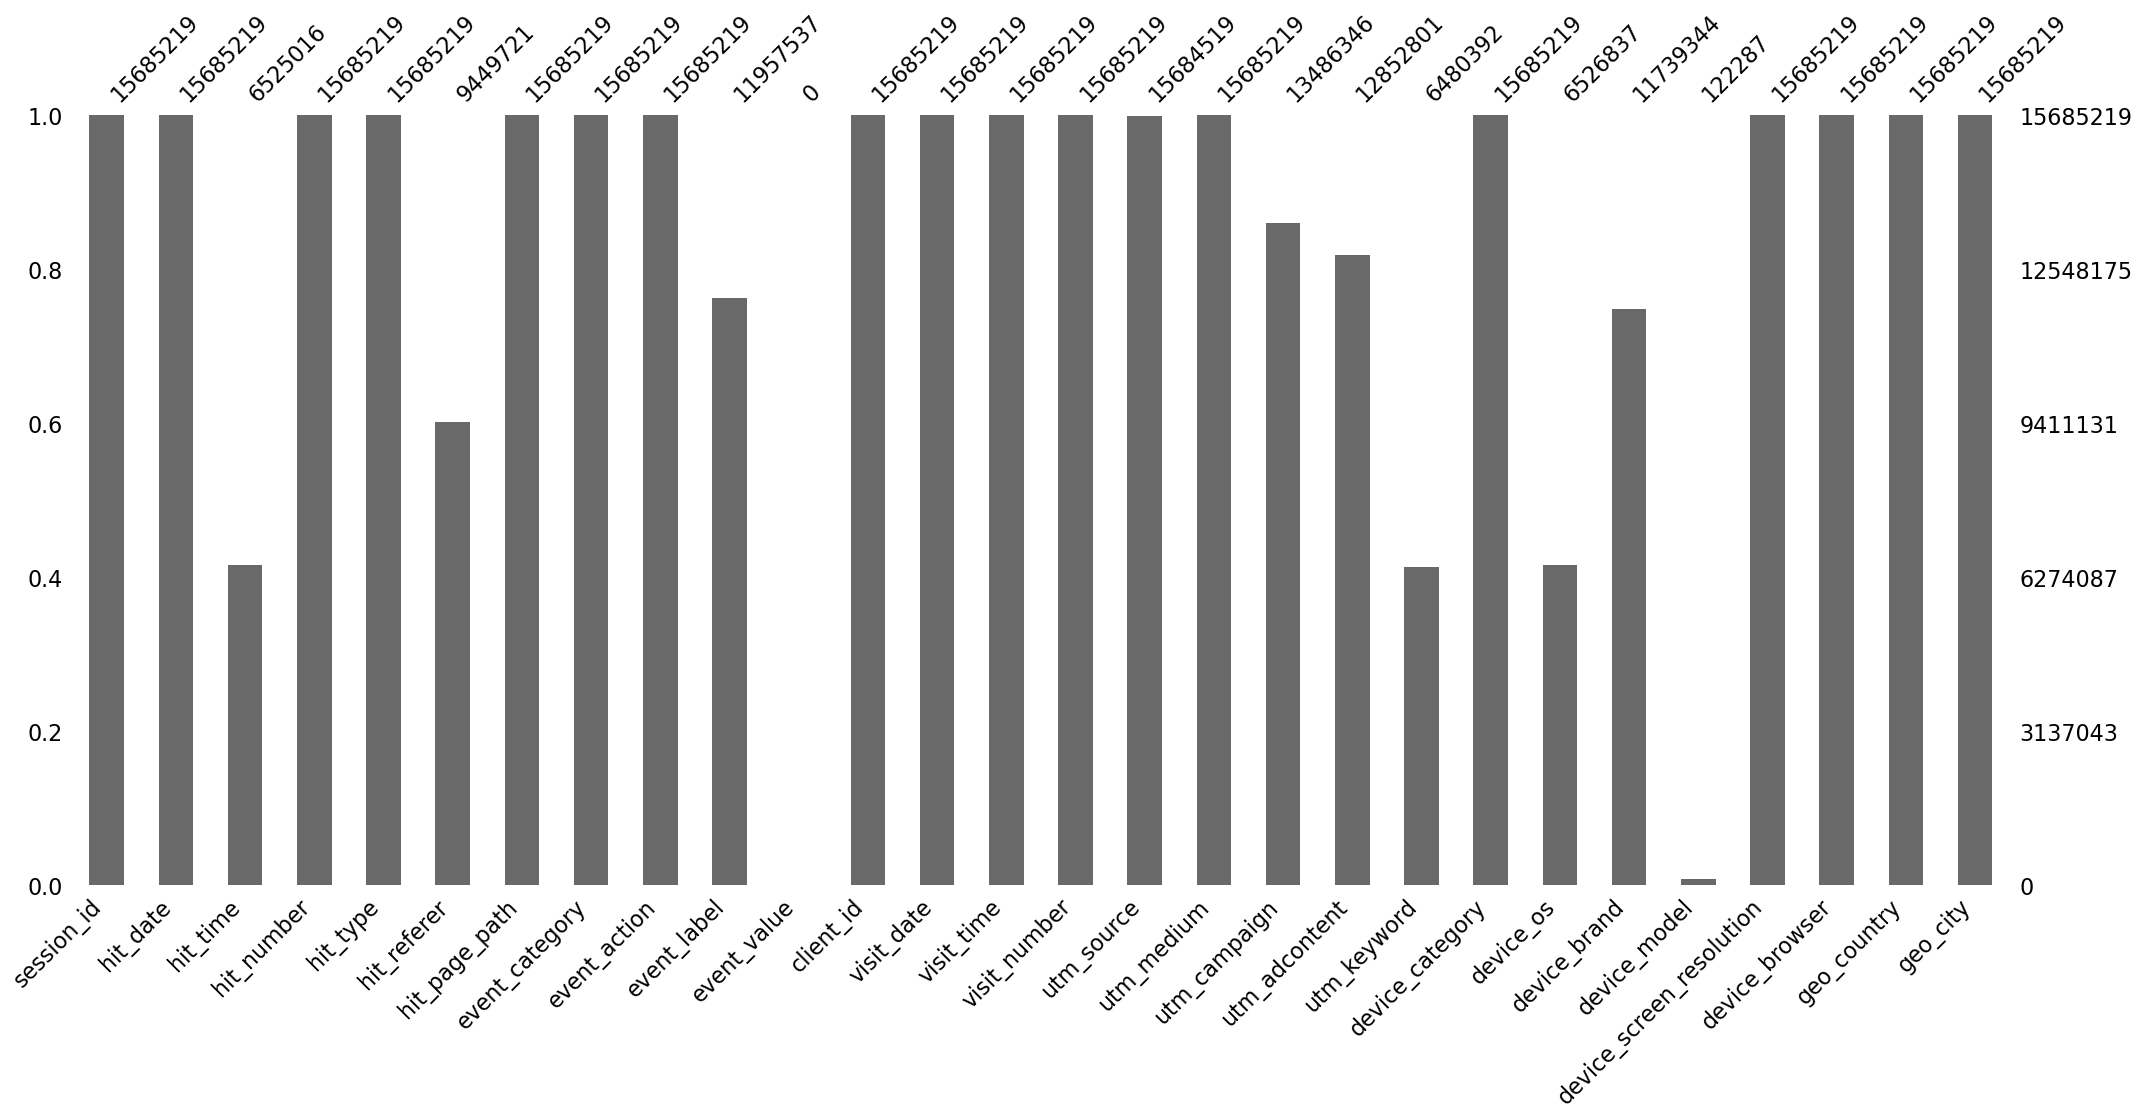

In [8]:
msno.bar(df)

<Axes: >

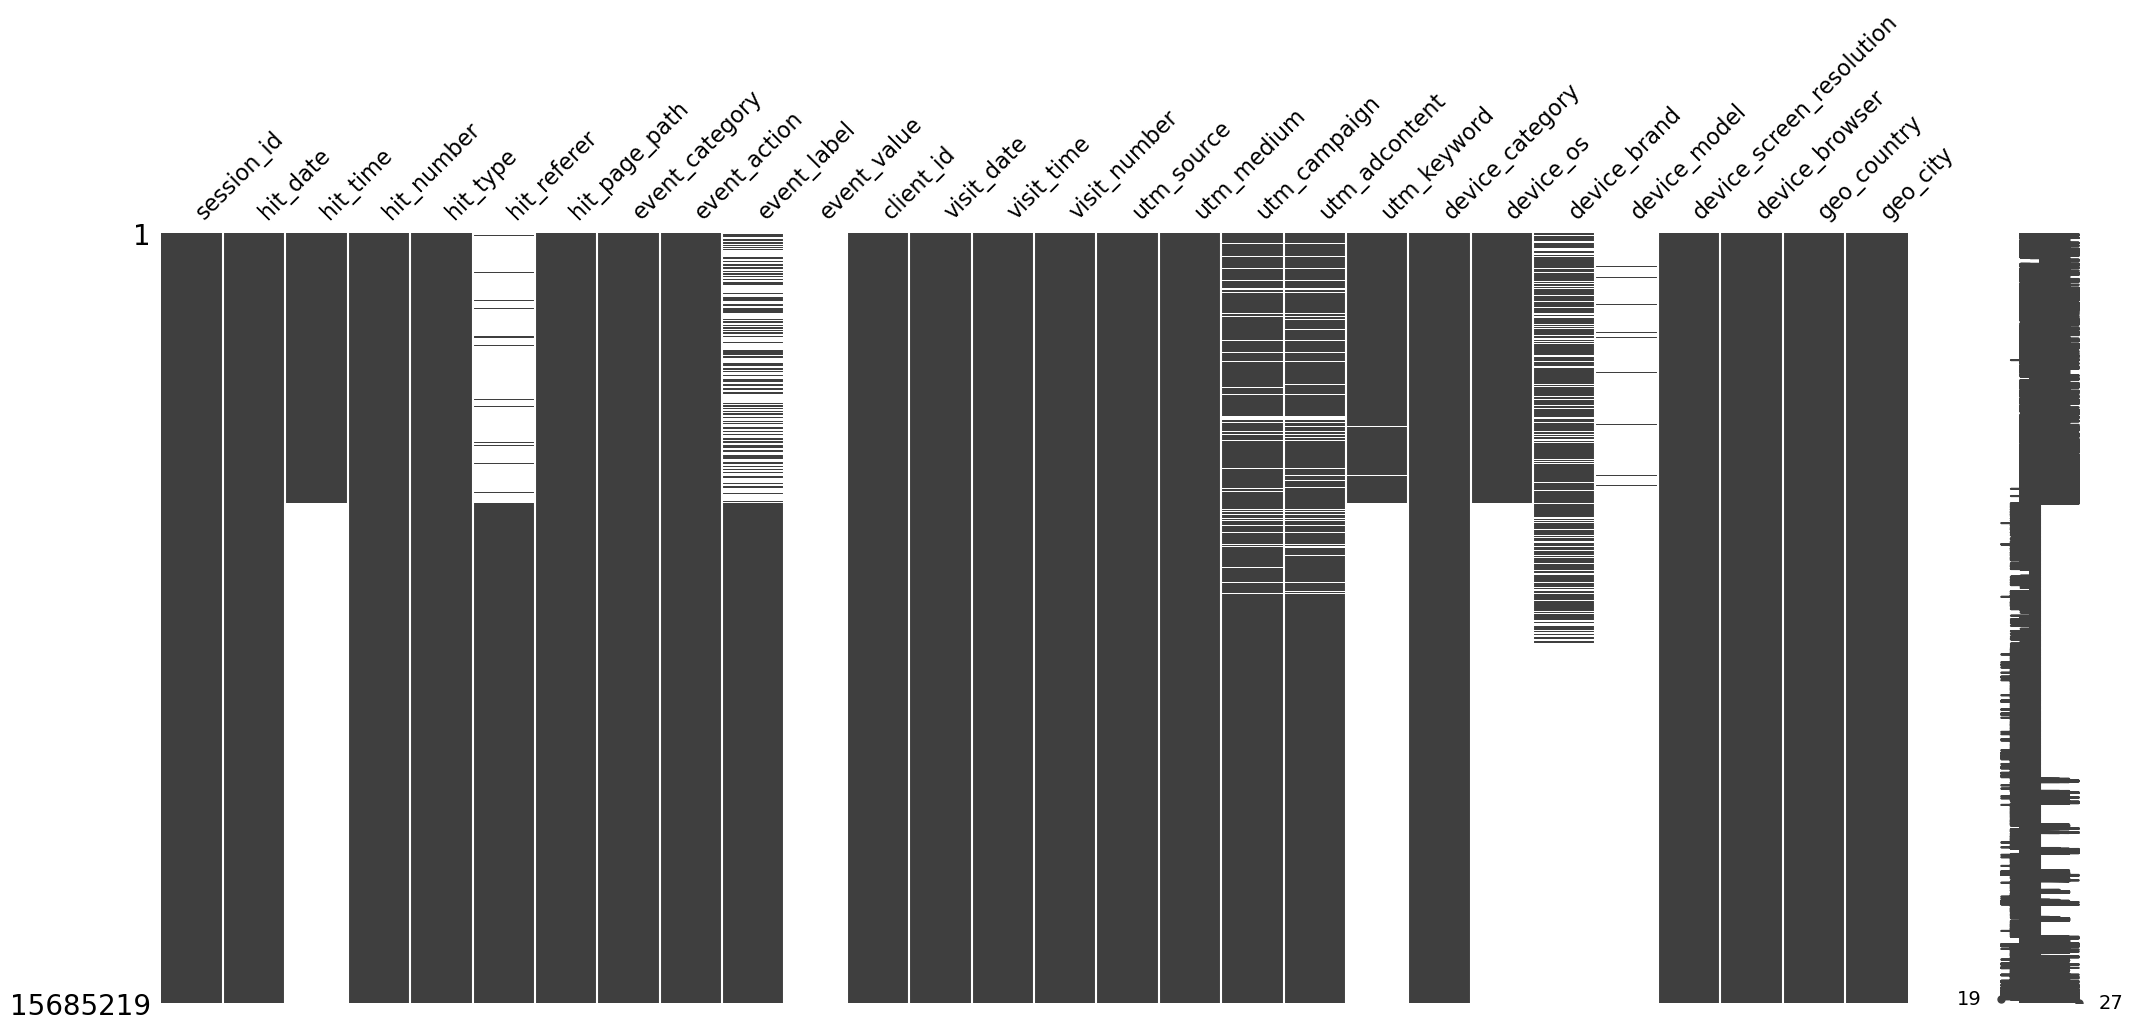

In [9]:
msno.matrix(df)

In [29]:
df_clean = df.copy()

In [30]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))
    

print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 0
Процент полностью заполненных объектов из всей выборки: 0.0


In [12]:
missing_values = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values(ascending=False)

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


event_value                 100.000000
device_model                 99.220368
utm_keyword                  58.684721
hit_time                     58.400224
device_os                    58.388614
hit_referer                  39.753975
device_brand                 25.156646
event_label                  23.765572
utm_adcontent                18.057880
utm_campaign                 14.018759
utm_source                    0.004463
session_id                    0.000000
geo_country                   0.000000
device_browser                0.000000
device_screen_resolution      0.000000
device_category               0.000000
visit_number                  0.000000
utm_medium                    0.000000
hit_date                      0.000000
visit_time                    0.000000
visit_date                    0.000000
client_id                     0.000000
event_action                  0.000000
event_category                0.000000
hit_page_path                 0.000000
hit_type                 

Удалим все столбцы у которых процент пропущенных значений превышает 20%.

In [31]:
df_clean = df_clean.drop(
    columns=['event_value', 'device_model', 'utm_keyword', 'hit_time', 'device_os', 
             'hit_referer', 'device_brand', 'event_label']
)
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 12747787
Процент полностью заполненных объектов из всей выборки: 81.27


Воспользовавшись переменной missing values, отсортируем признаки в которых остались пропущенные значения.

In [32]:
print('Список всех признаков, имеющих пропущенные значения:')
missing_values = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values(ascending=False)
missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

Список всех признаков, имеющих пропущенные значения:


['utm_adcontent', 'utm_campaign', 'utm_source']

Обработаем пропуски в приведенных выше признаках. Начнем с признака `utm_adcontent`.

In [33]:
df_clean['utm_adcontent'].value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    9647665
NaN                     2832418
vCIpmpaGBnIQhyYNkXqp    1806637
xhoenQgDQsgfEPYNPwKO     345071
PkybGvWbaqORmxjNunqZ     199457
                         ...   
gQEnaeQmOHisHSTEyzhp          1
FsyvyvqcdOnQCoOklwfT          1
FvtsWdHfGtOlguWeXGof          1
fiImkyBmzQSeAeQEVCDZ          1
VlbHDutfcfYJARFNICFX          1
Name: count, Length: 281, dtype: int64

In [34]:
df_clean['utm_adcontent'].describe()

count                 12852801
unique                     280
top       JNHcPlZPxEMWDnRiyoBf
freq                   9647665
Name: utm_adcontent, dtype: object

In [35]:
df_clean[df_clean['utm_adcontent'].isna()]

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,360x780,Chrome,Russia,Saint Petersburg
1,5639623078712724064.1640254056.1640254056,2021-12-23,12,event,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,360x780,Chrome,Russia,Saint Petersburg
2,5639623078712724064.1640254056.1640254056,2021-12-23,18,event,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,360x780,Chrome,Russia,Saint Petersburg
3,5639623078712724064.1640254056.1640254056,2021-12-23,20,event,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,360x780,Chrome,Russia,Saint Petersburg
4,5639623078712724064.1640254056.1640254056,2021-12-23,8,event,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,360x780,Chrome,Russia,Saint Petersburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685201,6029161696035012827.1636762263.1636762263,2021-11-13,1,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,1403773598.1636761819,2021-11-13,03:11:03,7,kjsLglQLzykiRbcDiGcD,cpc,bJJuEXRheRIxXEaYIXqM,NaN,mobile,375x667,Safari,Russia,Saint Petersburg
15685211,4862117084831971407.1640265810.1640265810,2021-12-23,2,event,podpiska.sberauto.com/?yclid=15764261540756717567,sub_page_view,sub_landing,1132049850.164026,2021-12-23,16:23:30,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,mobile,393x851,Chrome,Russia,Moscow
15685212,5666182417736807448.1640248347.1640248347,2021-12-23,2,event,podpiska.sberauto.com/?yclid=7640852971055541869,sub_page_view,sub_landing,1319260899.164025,2021-12-23,11:32:27,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,mobile,412x892,YaBrowser,Russia,Moscow
15685216,3349670872968620291.1640264206.1640264206,2021-12-23,1,event,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,quiz,quiz_show,779906025.164026,2021-12-23,15:56:46,2,QxAxdyPLuQMEcrdZWdWb,cpa,mSVMBvlHFgftJaQAZEdp,NaN,mobile,375x667,Safari (in-app),Russia,Samara


Удалим пропущенные значения рекламы.

In [36]:
df_clean = df_clean[~df_clean.utm_adcontent.isna()]
print('Количество пропущенных значений в utm_adcontent:', df_clean.utm_adcontent.isna().sum())

Количество пропущенных значений в utm_adcontent: 0


Рассмотрим пропуски в столбце рекламной кампании.

In [37]:
df_clean['utm_campaign'].value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    5166521
LEoPHuyFvzoNfnzGgfcd    3177265
gecBYcKZCPMcVYdSSzKP    1138547
FTjNLDyTrXaWYgZymFkV     750959
sbJRYgVfvcnqKJNDDYIr     184020
                         ...   
NUYvxgBEIYqMlnpeDTIM          1
KLznuVEblkSupUDWtCge          1
cXxuwXPoQCvAXPHpFcZl          1
RkpOyeEPgcMBSDuHLQcj          1
YlsczTIyBSwTLNtuDkCd          1
Name: count, Length: 264, dtype: int64

In [38]:
df_clean['utm_campaign'].describe()

count                 12748075
unique                     263
top       LTuZkdKfxRGVceoWkVyg
freq                   5166521
Name: utm_campaign, dtype: object

In [39]:
df_clean[df_clean['utm_campaign'].isna()]

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city
558,1945627655676404094.1640276355.1640276355,2021-12-23,4,event,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,453001739.1640276350,2021-12-23,19:19:15,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,2000x2000,Safari,United States,Forest City
559,1945627655676404094.1640276355.1640276355,2021-12-23,3,event,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_new_card,453001739.1640276350,2021-12-23,19:19:15,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,2000x2000,Safari,United States,Forest City
564,6993187768713388524.1640276467.1640276467,2021-12-23,4,event,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,1628228409.164028,2021-12-23,19:21:07,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,desktop,2000x2000,Chrome,United States,Prineville
565,6993187768713388524.1640276467.1640276467,2021-12-23,3,event,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_new_card,1628228409.164028,2021-12-23,19:21:07,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,desktop,2000x2000,Chrome,United States,Prineville
570,8279923128365523547.1640276571.1640276571,2021-12-23,3,event,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,1927819831.164028,2021-12-23,19:22:51,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,tablet,360x480,Chrome,Ireland,Dublin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15684022,4435276642179321009.1638894886.1638894886,2021-12-07,3,event,podpiska.sberauto.com/?fbclid=paaazp1teznaktem...,sub_page_view,sub_landing,1032668315.163889,2021-12-07,19:34:46,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,412x892,Android Webview,Russia,Moscow
15684025,6512443115673638752.1638832805.1638832805,2021-12-07,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,1516296322.163855,2021-12-07,02:20:05,4,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Russia,Stupino
15684026,6790138942070885368.1638829048.1638829048,2021-12-07,3,event,podpiska.sberauto.com/?fbclid=iwar2zqsmbpelmho...,sub_page_view,sub_landing,1580952420.163883,2021-12-07,01:17:28,1,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,414x896,Safari (in-app),Russia,Moscow
15684036,2892331455230101560.1638882569.1638882569,2021-12-07,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,673423394.1638778936,2021-12-07,16:09:29,3,QxAxdyPLuQMEcrdZWdWb,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,(not set)


Снова удалим пропуски.

In [40]:
df_clean = df_clean[~df_clean.utm_campaign.isna()]
print('Количество пропущенных значений в utm_campaign:', df_clean.utm_campaign.isna().sum())

Количество пропущенных значений в utm_campaign: 0


Теперь рассмотрим пропуски в колонке `utm_source`.

In [41]:
df_clean['utm_source'].value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    5151702
fDLlAcSmythWSCVMvqvL    3250926
bByPQxmDaMXgpHeypKSM    1161904
kjsLglQLzykiRbcDiGcD     633898
MvfHsxITijuriZxsqZqt     574454
                         ...   
LqFAuDnKaWBLMIsdIrqS          1
jqlUOdZBNZYfInQVcZlS          1
LigOnUObPodLDexszDtn          1
OOVxbzAjWMBOhTQWJgLx          1
gSwaXkJgHiWoIntUiupK          1
Name: count, Length: 278, dtype: int64

In [42]:
df_clean['utm_source'].describe()

count                 12747787
unique                     277
top       ZpYIoDJMcFzVoPFsHGJL
freq                   5151702
Name: utm_source, dtype: object

In [43]:
df_clean[df_clean['utm_source'].isna()]

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city
348277,8025307339522195714.1637497362.1637497362,2021-11-21,3,event,sberauto.com/moskva/cars?isnew=true&rental_car...,quiz,quiz_show,1868537473.163671,2021-11-21,15:22:42,3,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x780,Chrome,Russia,Sochi
660749,1380043242326371104.1637518268.1637518268,2021-11-21,9,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,card_web,photos_all,321316356.163648,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x740,Chrome,Russia,Izhevsk
660750,1380043242326371104.1637518268.1637518268,2021-11-21,14,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,card_web,view_new_card,321316356.163648,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x740,Chrome,Russia,Izhevsk
660751,1380043242326371104.1637518268.1637518268,2021-11-21,16,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,card_web,view_new_card,321316356.163648,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x740,Chrome,Russia,Izhevsk
660752,1380043242326371104.1637518268.1637518268,2021-11-21,8,event,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,card_web,view_new_card,321316356.163648,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,360x740,Chrome,Russia,Izhevsk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486034,1364914954463538089.1638478637.1638478637,2021-12-02,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,317794027.16344,2021-12-02,23:57:17,9,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,YaBrowser,Russia,Moscow
15618667,6998726425393932505.1639959088.1639959088,2021-12-20,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,1629517978.163988,2021-12-20,03:11:28,4,NaN,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,393x873,Chrome,Russia,Moscow
15618711,2204974488430283782.1640022724.1640022724,2021-12-20,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,513385629.16389,2021-12-20,20:52:04,20,NaN,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Russia,Moscow
15665797,1100240274910044288.1640728207.1640728207,2021-12-29,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,256169651.163731,2021-12-29,00:50:07,2,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,412x892,Chrome,Russia,Saint Petersburg


Удалим пропуски.

In [44]:
df_clean = df_clean[~df_clean.utm_source.isna()]
print('Количество пропущенных значений в utm_source:', df_clean.utm_source.isna().sum())

Количество пропущенных значений в utm_source: 0


Ещё раз выведем количество полностью заполненных объектов и их процент из всей выборки. 

In [45]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 12747787
Процент полностью заполненных объектов из всей выборки: 100.0


Сохраним новый датасет как csv-файл под названием df_clean.

In [46]:
df_clean.to_csv('./skillbox_data/df_clean.csv')

## Data Normalization

In [47]:
df = pd.read_csv('./skillbox_data/df_clean.csv')

In [48]:
df_types = df.copy()

In [49]:
df_types.head()

,Unnamed: 0,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,...,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city
0,38,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,1.804520e+09,2021-12-23,...,2,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk
1,39,7750352294969115059.1640271109.1640271109,2021-12-23,21,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,auth,name_entered,1.804520e+09,2021-12-23,...,2,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk
2,40,7750352294969115059.1640271109.1640271109,2021-12-23,37,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,user_message,1.804520e+09,2021-12-23,...,2,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk
3,41,7750352294969115059.1640271109.1640271109,2021-12-23,7,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,search_form,search_form_search_btn,1.804520e+09,2021-12-23,...,2,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk
4,42,7750352294969115059.1640271109.1640271109,2021-12-23,30,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,typing_in_leasing_chat,1.804520e+09,2021-12-23,...,2,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk


In [50]:
df_types = df_types.drop(['Unnamed: 0'], axis=1)
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12747787 entries, 0 to 12747786
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_number                int64  
 3   hit_type                  object 
 4   hit_page_path             object 
 5   event_category            object 
 6   event_action              object 
 7   client_id                 float64
 8   visit_date                object 
 9   visit_time                object 
 10  visit_number              int64  
 11  utm_source                object 
 12  utm_medium                object 
 13  utm_campaign              object 
 14  utm_adcontent             object 
 15  device_category           object 
 16  device_screen_resolution  object 
 17  device_browser            object 
 18  geo_country               object 
 19  geo_city                  object 
dtypes: float64(1), int64(2

In [51]:
df_types['hit_date'] = pd.to_datetime(df_types['hit_date'], format='%Y-%m-%d', utc=True)
df_types['hit_date']

0          2021-12-23 00:00:00+00:00
1          2021-12-23 00:00:00+00:00
2          2021-12-23 00:00:00+00:00
3          2021-12-23 00:00:00+00:00
4          2021-12-23 00:00:00+00:00
                      ...           
12747782   2021-12-23 00:00:00+00:00
12747783   2021-12-23 00:00:00+00:00
12747784   2021-12-23 00:00:00+00:00
12747785   2021-12-23 00:00:00+00:00
12747786   2021-12-23 00:00:00+00:00
Name: hit_date, Length: 12747787, dtype: datetime64[ns, UTC]

In [52]:
df_types['visit_datetime'] = df['visit_date'] + " " + df['visit_time']
df_types['visit_datetime']

0           2021-12-23 17:51:49
1           2021-12-23 17:51:49
2           2021-12-23 17:51:49
3           2021-12-23 17:51:49
4           2021-12-23 17:51:49
                   ...         
12747782    2021-12-23 15:51:32
12747783    2021-12-23 15:30:04
12747784    2021-12-23 16:46:30
12747785    2021-12-23 18:15:36
12747786    2021-12-23 17:53:16
Name: visit_datetime, Length: 12747787, dtype: object

In [53]:
df_types['visit_datetime'] = pd.to_datetime(df_types['visit_datetime'], format='%Y-%m-%d %H:%M:%S', utc=True)
df_types['visit_datetime']

0          2021-12-23 17:51:49+00:00
1          2021-12-23 17:51:49+00:00
2          2021-12-23 17:51:49+00:00
3          2021-12-23 17:51:49+00:00
4          2021-12-23 17:51:49+00:00
                      ...           
12747782   2021-12-23 15:51:32+00:00
12747783   2021-12-23 15:30:04+00:00
12747784   2021-12-23 16:46:30+00:00
12747785   2021-12-23 18:15:36+00:00
12747786   2021-12-23 17:53:16+00:00
Name: visit_datetime, Length: 12747787, dtype: datetime64[ns, UTC]

In [54]:
df_types['client_id'] = df_types['client_id'].astype(object)
df_types['client_id']

0           1804519513.164027
1           1804519513.164027
2           1804519513.164027
3           1804519513.164027
4           1804519513.164027
                  ...        
12747782    1072281029.164026
12747783     132856090.164026
12747784     397231861.164026
12747785    1923823451.164027
12747786    1252924027.164027
Name: client_id, Length: 12747787, dtype: object

In [55]:
df_types['device_category'].describe()

count     12747787
unique           3
top         mobile
freq       9657410
Name: device_category, dtype: object

In [56]:
series = df_types.device_category.astype('category')
series.dtype

CategoricalDtype(categories=['desktop', 'mobile', 'tablet'], ordered=False)

In [57]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12747787 entries, 0 to 12747786
Data columns (total 21 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   session_id                object             
 1   hit_date                  datetime64[ns, UTC]
 2   hit_number                int64              
 3   hit_type                  object             
 4   hit_page_path             object             
 5   event_category            object             
 6   event_action              object             
 7   client_id                 object             
 8   visit_date                object             
 9   visit_time                object             
 10  visit_number              int64              
 11  utm_source                object             
 12  utm_medium                object             
 13  utm_campaign              object             
 14  utm_adcontent             object             
 15  device_catego

In [58]:
df_types.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime
0,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,1804519513.164027,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,21,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,auth,name_entered,1804519513.164027,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
2,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,37,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,user_message,1804519513.164027,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
3,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,7,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,search_form,search_form_search_btn,1804519513.164027,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
4,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,30,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,typing_in_leasing_chat,1804519513.164027,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00


Все изменения сохраним в новый файл df_types.

In [59]:
df_types.to_csv('./skillbox_data/df_types.csv', index=False)

Откроем новый датасет и обработаем аномалии и выбросы.

In [60]:
df = pd.read_csv('./skillbox_data/df_types.csv')
df_out = df.copy()

In [61]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [62]:
df_out['hit_number'].describe().apply(lambda x: f'{x:0.3f}')

count    12747787.000
mean           23.705
std            28.953
min             1.000
25%             8.000
50%            15.000
75%            29.000
max           500.000
Name: hit_number, dtype: object

In [63]:
boundaries_hit_number = calculate_outliers(df_out['hit_number'])
boundaries_hit_number

(-23.5, 60.5)

In [64]:
is_outlier = (df_out['hit_number'] < boundaries_hit_number[0]) | (df_out['hit_number'] > boundaries_hit_number[1])
is_outlier.sum()

920640

In [65]:
df_out[is_outlier]

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime
45,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
55,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,73,event,sberauto.com/cars/all/toyota/camry/f28947a1?re...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
60,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,62,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
62,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,65,event,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?ren...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
70,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,71,event,sberauto.com/cars/all/toyota/camry/f28947a1?re...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744424,7841727651172923809.1636120995.1636123952,2021-11-05 00:00:00+00:00,111,event,podpiska.sberauto.com/,sub_page_view,sub_landing,1.825794e+09,2021-11-05,17:52:32,...,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,YaBrowser,Russia,Saint Petersburg,2021-11-05 17:52:32+00:00
12744633,2815358932548688305.1640602033.1640603576,2021-12-27 00:00:00+00:00,136,event,podpiska.sberauto.com/,sub_page_view,sub_landing,6.555018e+08,2021-12-27,14:12:56,...,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1600x900,Chrome,Russia,Saint Petersburg,2021-12-27 14:12:56+00:00
12746343,4482263133423468267.1636375669.1636376003,2021-11-08 00:00:00+00:00,88,event,podpiska.sberauto.com/,sub_page_view,sub_landing,1.043608e+09,2021-11-08,15:53:23,...,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,390x844,Safari,Russia,Klimovsk,2021-11-08 15:53:23+00:00
12746392,81620787035440335.1636369614.1636370301,2021-11-08 00:00:00+00:00,76,event,podpiska.sberauto.com/,sub_page_view,sub_landing,1.900382e+07,2021-11-08,14:18:21,...,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1920x1080,Chrome,Russia,Krasnodar,2021-11-08 14:18:21+00:00


In [66]:
df_out.hit_number[is_outlier].value_counts(dropna=False)

hit_number
61     30989
62     29565
63     28444
64     27228
65     26014
       ...  
487       39
499       39
494       37
497       37
486       36
Name: count, Length: 440, dtype: int64

Удалим все аномальные значения и сохраним датафрейм без аномалий.

In [67]:
df_out = df_out[~(df_out.hit_number.isin(df_out[is_outlier].hit_number))]

In [68]:
df_out['visit_number'].describe().apply(lambda x: f'{x:0.3f}')

count    11827147.000
mean            2.313
std            10.274
min             1.000
25%             1.000
50%             1.000
75%             1.000
max           564.000
Name: visit_number, dtype: object

In [69]:
boundaries_visit_number = calculate_outliers(df_out['visit_number'])
boundaries_visit_number

(1.0, 1.0)

In [70]:
is_outlier = (df_out['visit_number'] < boundaries_visit_number[0]) | (df_out['visit_number'] > boundaries_visit_number[1])
is_outlier.sum()

2467094

In [71]:
df_out[is_outlier]

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime
0,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,1.804520e+09,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,21,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,auth,name_entered,1.804520e+09,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
2,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,37,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,user_message,1.804520e+09,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
3,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,7,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,search_form,search_form_search_btn,1.804520e+09,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
4,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,30,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,chat,typing_in_leasing_chat,1.804520e+09,2021-12-23,17:51:49,...,ZpYIoDJMcFzVoPFsHGJL,banner,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23 17:51:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747778,1312498915886306194.1636806266.1636806457,2021-11-13 00:00:00+00:00,8,event,sberauto.com/cars?city=1&city=18&rental_page=r...,cars,view_more_click,3.055900e+08,2021-11-13,15:27:37,...,bByPQxmDaMXgpHeypKSM,referral,hkvDVxqLOzGjGaoNiNzN,sYzBROYhjSDbFZCpzGyf,desktop,1366x768,Opera,Russia,Ufa,2021-11-13 15:27:37+00:00
12747779,6388511726962324343.1636782953.1636782953,2021-11-13 00:00:00+00:00,1,event,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,quiz,quiz_show,1.487441e+09,2021-11-13,08:55:53,...,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,412x823,Chrome,Russia,Samara,2021-11-13 08:55:53+00:00
12747783,570612563264688637.1640262604.1640262604,2021-12-23 00:00:00+00:00,1,event,sberauto.com/cars/all/volkswagen/touareg/9e072...,quiz,quiz_show,1.328561e+08,2021-12-23,15:30:04,...,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,412x869,Chrome,Russia,Chelyabinsk,2021-12-23 15:30:04+00:00
12747784,1706097853564481669.1640267190.1640267190,2021-12-23 00:00:00+00:00,1,event,sberauto.com/moskva/cars?datefrom=2021&rental_...,quiz,quiz_show,3.972319e+08,2021-12-23,16:46:30,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,428x926,Safari,Russia,Moscow,2021-12-23 16:46:30+00:00


In [72]:
df_out = df_out[~(df_out.visit_number.isin(df_out[is_outlier].visit_number))]

Сохраним новый датасет в файле df_new.

In [73]:
df_out.to_csv('./skillbox_data/df_new.csv', index=False)

## Data Standardization

In [2]:
df = pd.read_csv('./skillbox_data/df_new.csv')
df.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime
0,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,20,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
1,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,29,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
2,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,16,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
3,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,21,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,27,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00


In [3]:
data = df[['hit_number', 'visit_number']]
data.head()

,hit_number,visit_number
0,20,1
1,29,1
2,16,1
3,21,1
4,27,1


In [4]:
std_scaler = StandardScaler()

In [5]:
std_scaler.fit(data)

StandardScaler()

In [6]:
std_scaled = std_scaler.transform(data)
std_scaled.shape

(9360053, 2)

In [7]:
hit_number_std = std_scaled[0]
visit_number_std = std_scaled[1]

In [8]:
df[['hit_number_std', 'visit_number_std']] = std_scaled
df.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,hit_number_std,visit_number_std
0,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,20,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.171878,0.0
1,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,29,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.836463,0.0
2,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,16,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,-0.123494,0.0
3,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,21,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.245721,0.0
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,27,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.688778,0.0


In [13]:
df.to_csv('./skillbox_data/sber_data.csv', index=False)

## Data Visualisation

Посмотрим несколько графиков, чтобы исследовать зависимости даных.

In [2]:
df = pd.read_csv('./skillbox_data/sber_data.csv')
df.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_date,visit_time,...,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,hit_number_std,visit_number_std
0,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,20,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.171878,0.0
1,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,29,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.836463,0.0
2,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,16,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,-0.123494,0.0
3,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,21,event,sberauto.com/cars/all/bmw/2-serii/884c2872?ren...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.245721,0.0
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,27,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,card_web,view_new_card,8.032858e+08,2021-12-23,16:11:18,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23 16:11:18+00:00,0.688778,0.0


In [3]:
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360053 entries, 0 to 9360052
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   hit_date                  object 
 2   hit_number                int64  
 3   hit_type                  object 
 4   hit_page_path             object 
 5   event_category            object 
 6   event_action              object 
 7   client_id                 float64
 8   visit_date                object 
 9   visit_time                object 
 10  visit_number              int64  
 11  utm_source                object 
 12  utm_medium                object 
 13  utm_campaign              object 
 14  utm_adcontent             object 
 15  device_category           object 
 16  device_screen_resolution  object 
 17  device_browser            object 
 18  geo_country               object 
 19  geo_city                  object 
 20  visit_datetime          

In [5]:
data.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_page_path',
       'event_category', 'event_action', 'client_id', 'visit_date',
       'visit_time', 'visit_number', 'utm_source', 'utm_medium',
       'utm_campaign', 'utm_adcontent', 'device_category',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'visit_datetime', 'hit_number_std', 'visit_number_std'],
      dtype='object')

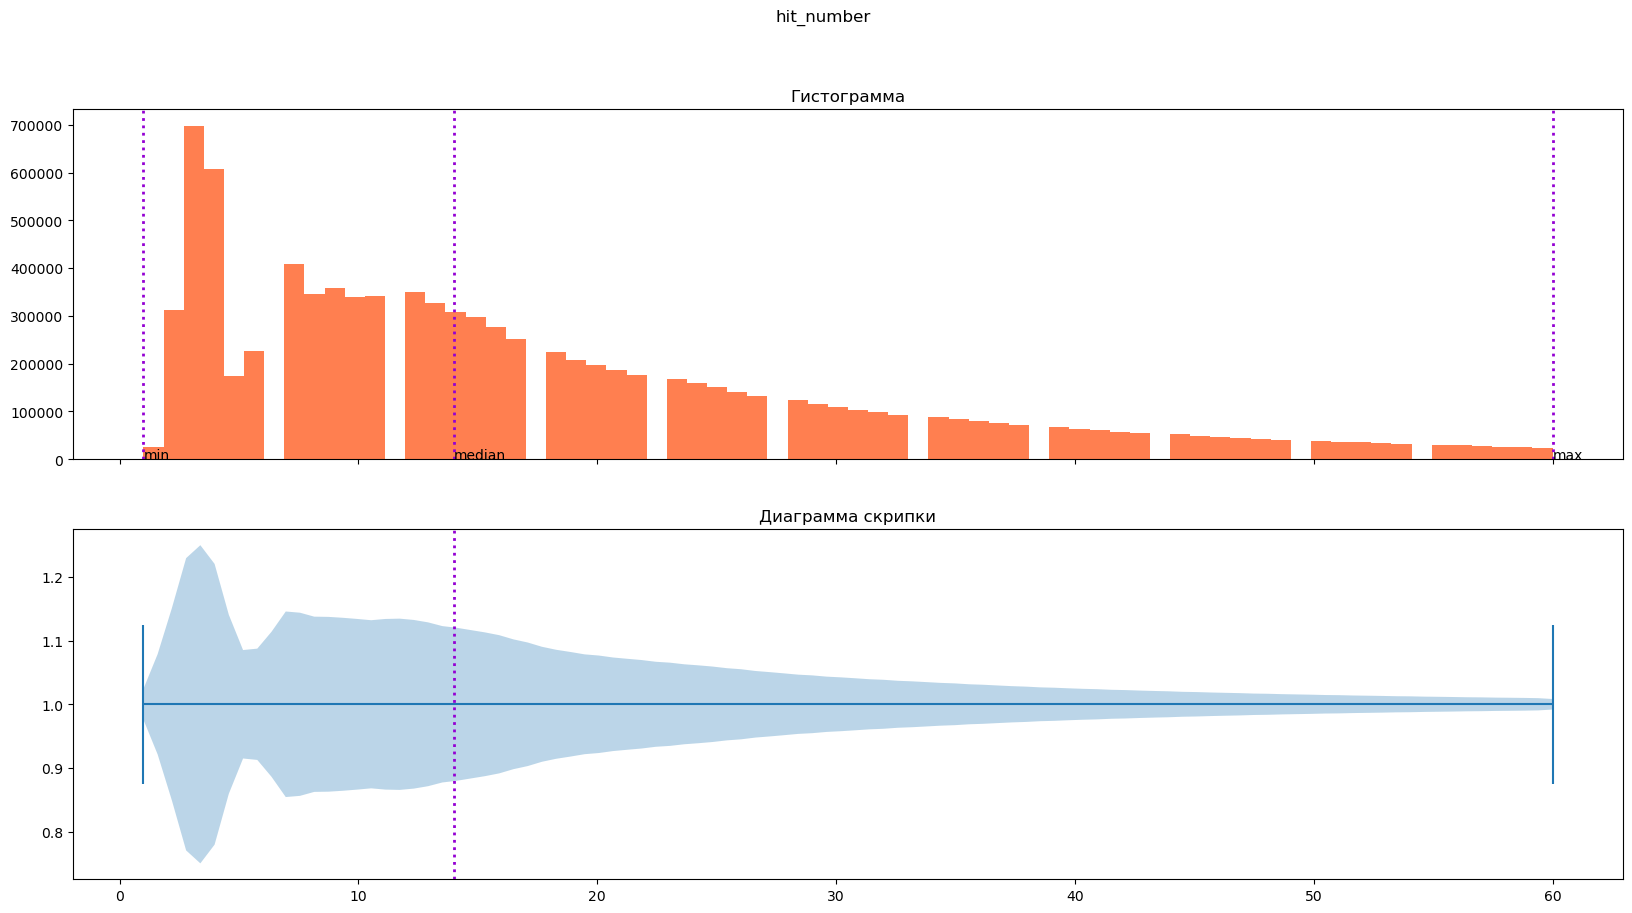

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

ax1.hist(data.hit_number, bins=70, color='coral')
ax1.set_title('Гистограмма')
ax1.axvline(data.hit_number.median(), color='darkviolet', linestyle='dotted', linewidth=2)
ax1.axvline(data.hit_number.min(), color='darkviolet', linestyle='dotted', linewidth=2)
ax1.axvline(data.hit_number.max(), color='darkviolet', linestyle='dotted', linewidth=2)

ax1.text(data.hit_number.median(),-100,'median',rotation=0)
ax1.text(data.hit_number.min(),-100,'min',rotation=0)
ax1.text(data.hit_number.max(),-100,'max',rotation=0)

ax2.violinplot(data.hit_number, vert=False)
ax2.axvline(data.hit_number.median(), color='darkviolet', linestyle='dotted', linewidth=2)
ax2.set_title('Диаграмма скрипки')

fig.suptitle('hit_number');

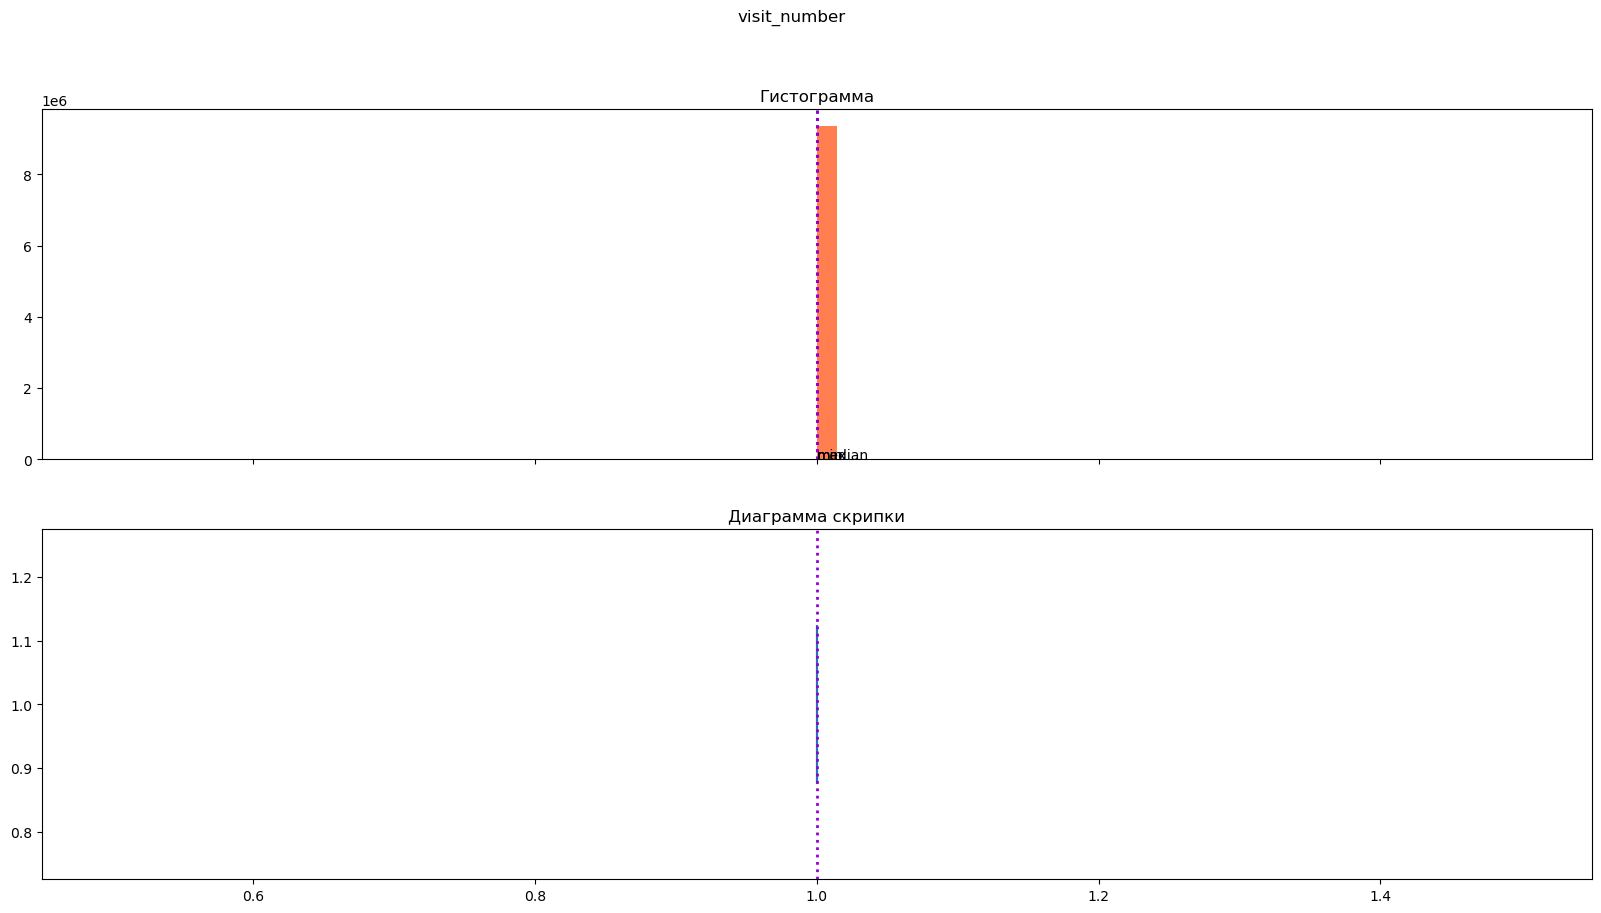

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

ax1.hist(data.visit_number, bins=70, color='coral')
ax1.set_title('Гистограмма')
ax1.axvline(data.visit_number.median(), color='darkviolet', linestyle='dotted', linewidth=2)
ax1.axvline(data.visit_number.min(), color='darkviolet', linestyle='dotted', linewidth=2)
ax1.axvline(data.visit_number.max(), color='darkviolet', linestyle='dotted', linewidth=2)

ax1.text(data.visit_number.median(),-100,'median',rotation=0)
ax1.text(data.visit_number.min(),-100,'min',rotation=0)
ax1.text(data.visit_number.max(),-100,'max',rotation=0)

ax2.violinplot(data.visit_number, vert=False)
ax2.axvline(data.visit_number.median(), color='darkviolet', linestyle='dotted', linewidth=2)
ax2.set_title('Диаграмма скрипки')

fig.suptitle('visit_number');

In [39]:
data['client_id'].nunique()

1112852

In [48]:
stats1 = data.groupby(['geo_country'], as_index = False)['client_id'].count()
stats1 = stats1.rename(columns = {'client_id':'count'})
stats1

,geo_country,count
0,(not set),6559
1,Afghanistan,151
2,Albania,126
3,Algeria,239
4,Andorra,59
...,...,...
148,Venezuela,180
149,Vietnam,467
150,Wallis & Futuna,114
151,Yemen,3


Для того чтобы посмотреть на распределение клиентской базы по странам, нужно будет отфильтровать таблицу.

In [54]:
stats1 = stats1[~(stats1['count']<1000) | (stats1['geo_country']=='Russia')]
stats1

,geo_country,count
0,(not set),6559
8,Armenia,3898
11,Austria,1152
12,Azerbaijan,1797
15,Belarus,19269
18,Brazil,1307
19,Bulgaria,1766
24,Canada,1720
33,Cyprus,4402
34,Czechia,1808


Из графика видно, что после России самыми распротраненными локациями являются Украина, Белорусь, США, Германия и Турция.

Text(0.5, 1.0, 'Распределение по странам')

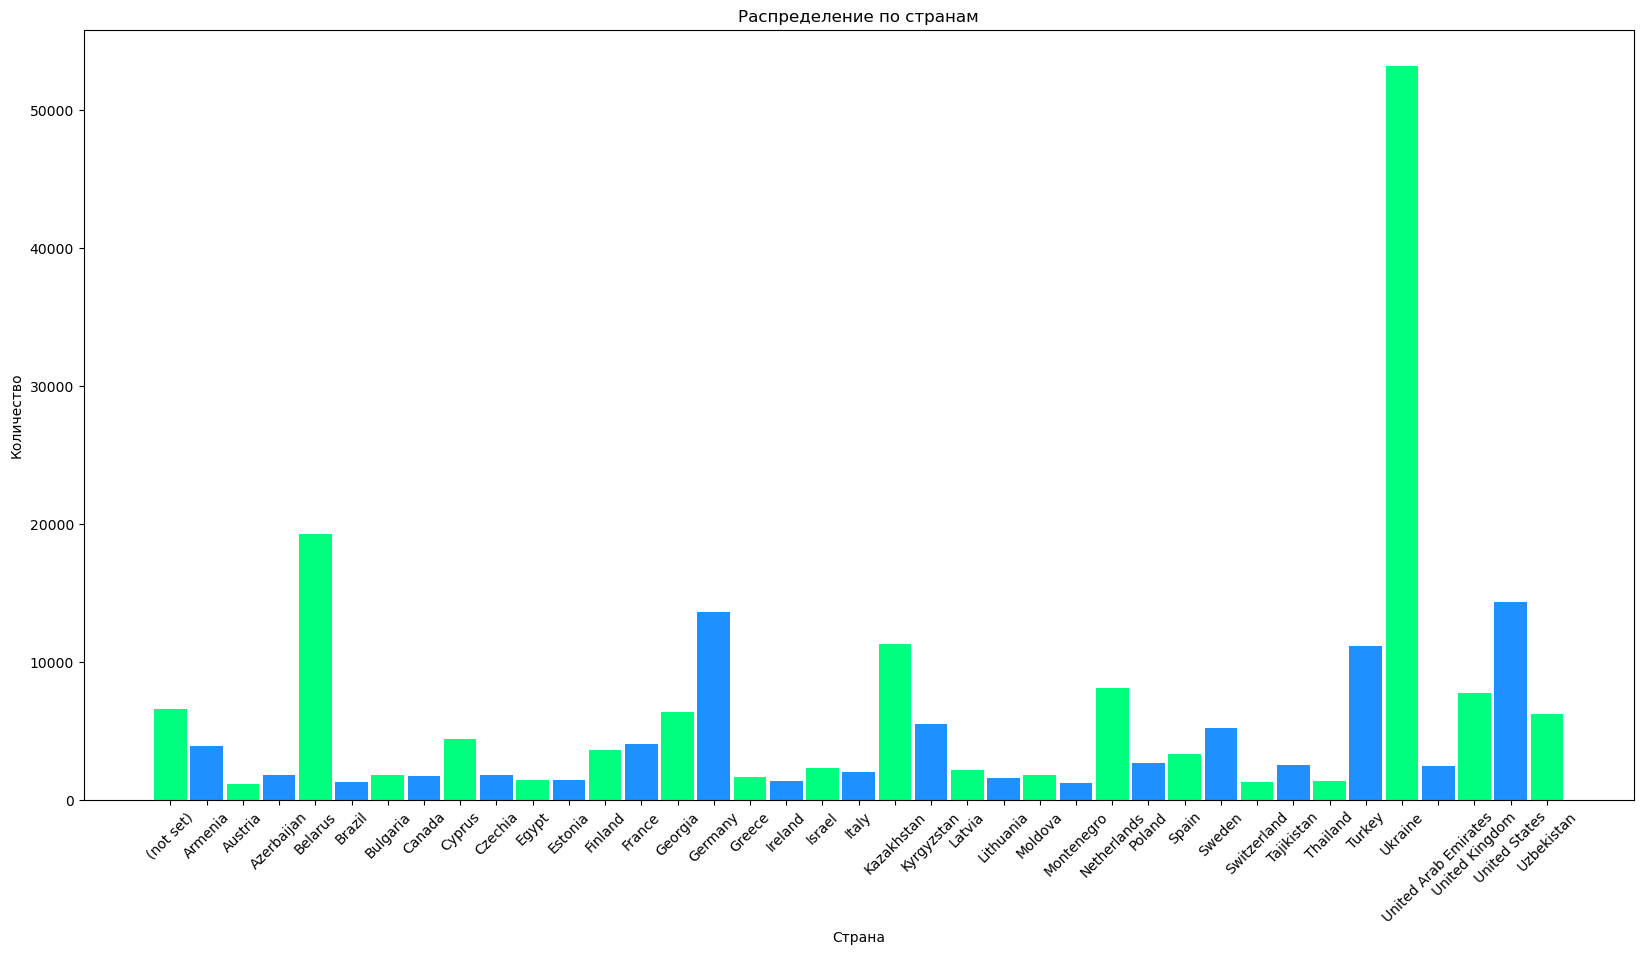

In [55]:
plt.figure(figsize=(20, 10))
plt.bar(stats1['geo_country'], stats1['count'], width=0.9, color=['springgreen', 'dodgerblue'])
plt.xlabel('Страна')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.title('Распределение по странам')

In [100]:
actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']
data_action = data[data['event_action'].isin(actions)]

In [101]:
stats3 = data_action.groupby(['event_action'], as_index = False)['client_id'].count()
stats3 = stats3.rename(columns = {'client_id':'count'})
stats3

,event_action,count
0,sub_call_number_click,1253
1,sub_callback_submit_click,985
2,sub_car_claim_click,18919
3,sub_car_claim_submit_click,5865
4,sub_car_request_submit_click,1304
5,sub_custom_question_submit_click,209
6,sub_open_dialog_click,11437
7,sub_submit_success,8076


Text(0.5, 1.0, 'Распределение целевых действий')

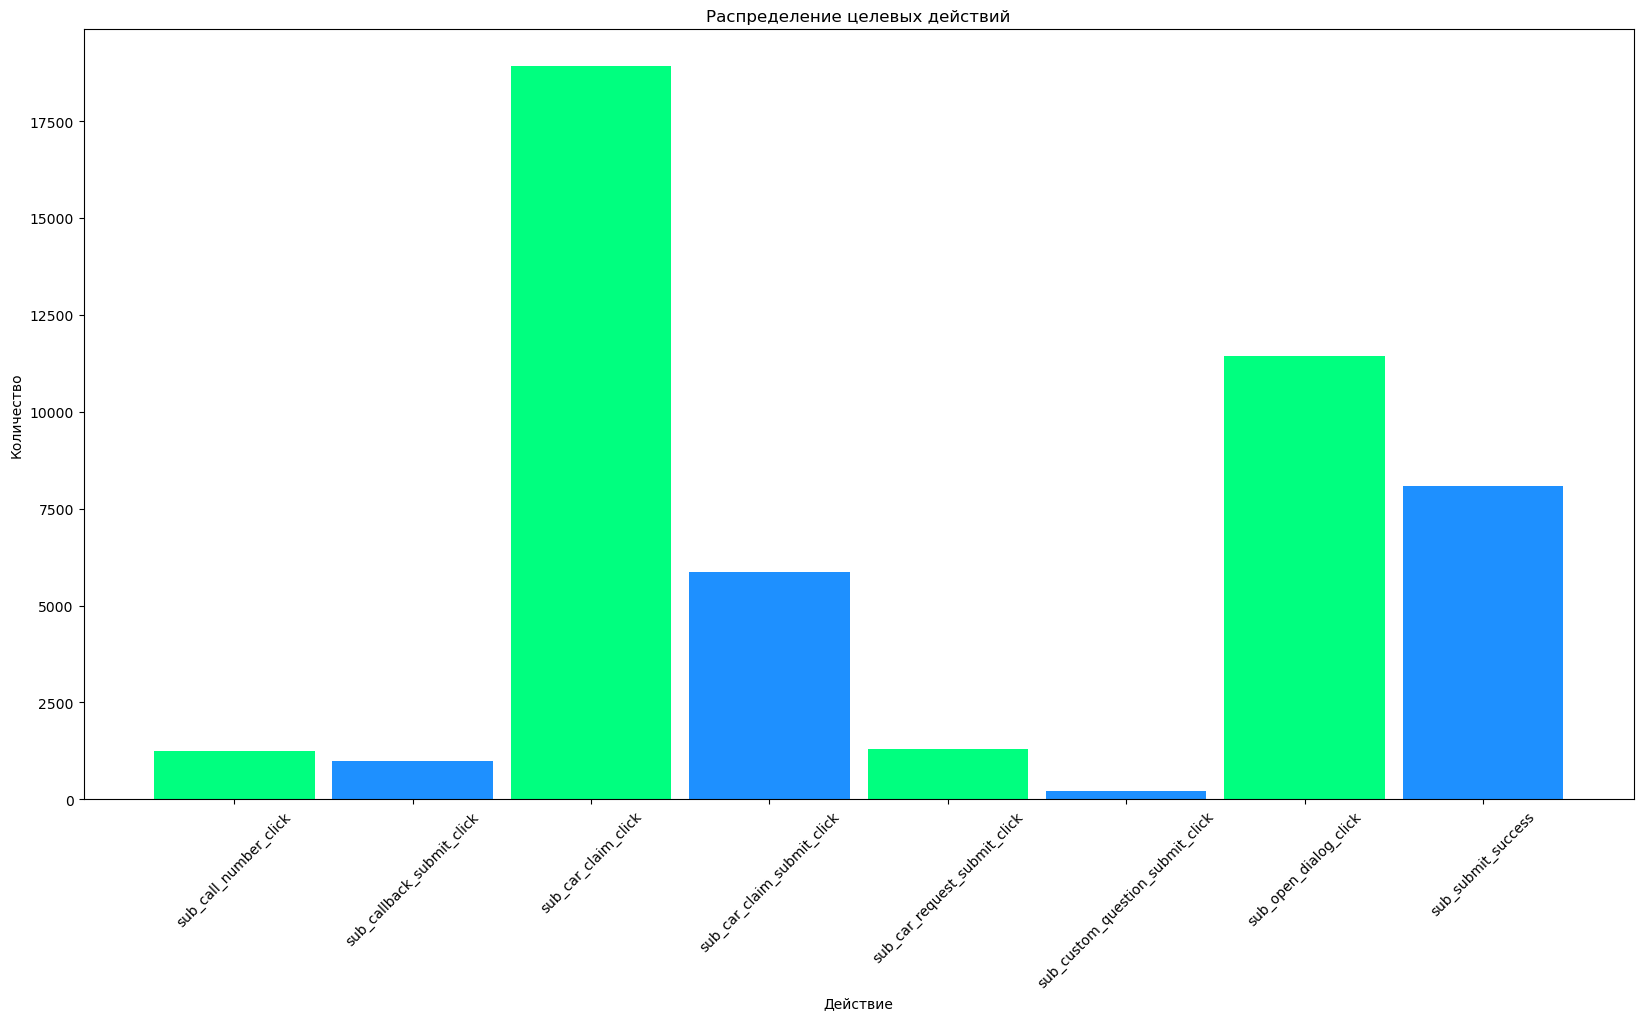

In [102]:
plt.figure(figsize=(20, 10))
plt.bar(stats3['event_action'], stats3['count'], width=0.9, color=['springgreen', 'dodgerblue'])
plt.xlabel('Действие')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.title('Распределение целевых действий')

In [104]:
data2 = data[['client_id', 'hit_number', 'visit_number']]. copy()
data2

,client_id,hit_number,visit_number
0,8.032858e+08,20,1
1,8.032858e+08,29,1
2,8.032858e+08,16,1
3,8.032858e+08,21,1
4,8.032858e+08,27,1
...,...,...,...
9360048,9.275897e+08,4,1
9360049,3.113300e+08,2,1
9360050,6.380088e+08,2,1
9360051,1.072281e+09,2,1


In [105]:
data2.corr()

,client_id,hit_number,visit_number
client_id,1.000000,0.001049,NaN
hit_number,0.001049,1.000000,NaN
visit_number,NaN,NaN,NaN


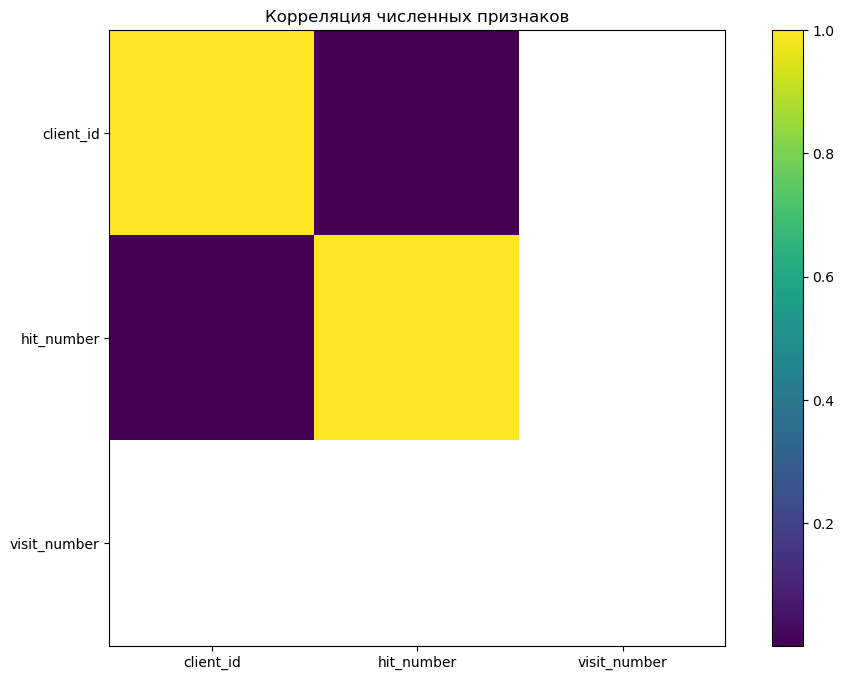

In [106]:
plt.figure(figsize=(12, 8))
columns = data2.corr().columns.tolist()
plt.imshow(data2.corr())

plt.title('Корреляция численных признаков')
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()